#Why should I bother learning python?

<img src="images/cartoon.jpeg">

###Most coding languages have advantages for specific use cases... LOLCODE does not.
<img src="images/lolcode.png" width="50%" height="50%">
<img src="images/lolcode_example.png" width="50%" height="50%">
###This lecture will be addressing the advantages of python for bioinformatics data analysis coding environments.

#"I would love to be able to interact with this code as ~~Rachel~~ Argus talks... How can I do that?"

You're in luck! iPython (which stands for "interactive Python") has a notebook format which is easy to open and edit.

###To Open:
If you have downloaded the Anaconda distribution, you should already have ipython notebooks at your commandline.


Select the "Introduction to Python - Cancer Variant Classification" notebook.

###To Edit:

Double click on any cell.

### To Run:

Select Cell -> Run from menu or click triangle or learn <a href="http://johnlaudun.org/20131228-ipython-notebook-keyboard-shortcuts/">shortcuts</a>.

#Cancer Variant Classification

Cancer is caused by variations in the genome. However, patients have thousands of germline variants and hundreds of somatic mutations. 

###Can we predict which somatic mutations "drive" cancer and which are just "passengers"?

We will be working with The Cancer Genome Atlast (TCGA), which is a large cancer data set used in lots of cancer research. 

<img src="images/tcga.jpg">

##Let's start by getting the mutation calls

These are stored in Mutation Annotation Format (MAF). Shout out to <a href="https://github.com/theandygross/TCGA">Andy Gross</a> for some of this code.

###Warning:
Here I download updated clinical data from the TCGA Data Portal. This is a secure site which uses HTTPS. I had to give it a path to my ca-cert for the download to work. Download a copy of a generic cacert.pem [here](http://curl.haxx.se/ca/cacert.pem).

In [1]:
PATH_TO_CACERT = 'cacert.pem'

####os - a standard library that fascilitates communication with the operating system

In [2]:
import os
out_path = 'mafs'
if not os.path.isdir(out_path):
    os.makedirs(out_path)

In [3]:
maf_dashboard = 'https://confluence.broadinstitute.org/display/GDAC/MAF+Dashboard'

####'!' allows you to write bash directly to the command line;  python variables can be used with the '$' symbol

In [4]:
! curl --cacert {PATH_TO_CACERT} {maf_dashboard} -o mafs/tmp.html

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100  144k    0  144k    0     0  43885      0 --:--:--  0:00:03 --:--:-- 43885
100  232k    0  232k    0     0  60283      0 --:--:--  0:00:03 --:--:-- 60283


####bs4 (BeautifulSoup) - a library for parsing HTML and XML files

In [5]:
from bs4 import BeautifulSoup
f = open('mafs/tmp.html', 'rb').read()
soup = BeautifulSoup(f)

C:\Users\argus_000\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [6]:
r = [l.get('href') for l in soup.find_all('a')
   if l.get('href') != None
   and '.maf' in l.get('href')]

####Note: we are only using one of the maf files for the sake of this lecture because it takes a while to download all of them

In [8]:
a_maf_file = r[0]
print(a_maf_file)

https://tcga-data.nci.nih.gov/tcgafiles/ftp_auth/distro_ftpusers/anonymous/tumor/acc/gsc/bcgsc.ca/multicenter_mutation_calling_mc3/mutations/bcgsc.ca_ACC.Multicenter_mutation_calling_MC3.Level_2.1.0.0/bcgsc.ca_ACC.IlluminaHiSeq_DNASeq.1.somatic.maf


In [17]:
# Take my word this works normally - for now just use the maf file already in your maf folder. 
#! curl $a_maf_file > mafs/a_maf_file.tsv

##Detour:
###pandas - library for high performance data structures and data analysis 

<img src="images/pandas_real.jpg">


(will likely become your best friend - bite the bullet and learn how to use it as soon as possible)

###Some things to know about pandas before we dive in:

* It is built on top of numpy (numerical python), which allows you to do some fancy things with numbers and sequences

In [10]:
import numpy as np
# a one dimensional array
x = np.array([2, 7, 5])
print ('x:', x)

x: [2 7 5]


In [11]:
# a sequence starting from 4 to 12 with a step size of 3
y = np.arange(4, 12, 3)
print ('y:', y)

y: [ 4  7 10]


In [12]:
# element-wise operations on arrays
print ('x + y:', x + y)
print ('x / y:', x / y)
print ('x ^ y:', x ** y) 

x + y: [ 6 14 15]
x / y: [ 0.5  1.   0.5]
x ^ y: [     16  823543 9765625]


* it also integrates well with scipy (scientific python), which will be your best resource for any complex statistics
* let's also just introduce matplotlib while we are at it - pyplot is one of the most popular plotting tools in python

##### '%matplotlib inline' is a magic function that allows you to do all of your plotting inside an ipython notebook

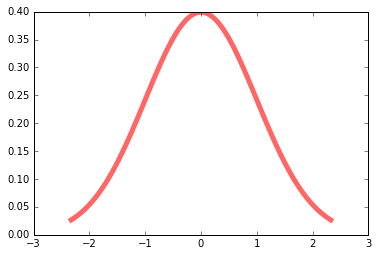

In [14]:
%matplotlib inline

from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')

##Now back to our cancer variants. Let's use pandas to get them into a dataframe.

In [18]:
import pandas as pd
maf_df = pd.read_csv('mafs/a_maf_file.tsv', sep='\t', header=0, skiprows= 4, comment='#')
maf_df.head()

C:\Users\argus_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (38,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,...,t_ref_count,validation_alt_allele,validation_method,validation_status,validation_tumor_sample,pox,qox,pox_cutoff,isArtifactMode,oxoGCut
0,KLHL3,26249,broad.mit.edu,37,5,136973018,136973018,+,Missense_Mutation,SNP,...,74,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
1,KLHDC4,54758,broad.mit.edu,37,16,87742934,87742934,+,Missense_Mutation,SNP,...,95,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
2,HIST1H3B,8358,broad.mit.edu,37,6,26031919,26031919,+,Missense_Mutation,SNP,...,61,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
3,GABRA1,2554,broad.mit.edu,37,5,161300197,161300197,+,Silent,SNP,...,49,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
4,SCARF1,8578,broad.mit.edu,37,17,1543262,1543262,+,Silent,SNP,...,88,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0


####Now we have all of our somatic mutations.

(If you haven't figured out the cacert.pem thing, here's an alternative so we can all stay together during the lecture. I am going to output the dataframe to a file and include the file in your folder.)

In [19]:
maf_df.to_csv('mafs/another_maf_file.tsv', sep='\t', index=False)

####Importing directly from a given file in the folder to get the same dataframe

In [20]:
maf_df = pd.read_csv('mafs/another_maf_file.tsv', sep='\t', header=0, comment='#')
maf_df.head()

C:\Users\argus_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (38,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,...,t_ref_count,validation_alt_allele,validation_method,validation_status,validation_tumor_sample,pox,qox,pox_cutoff,isArtifactMode,oxoGCut
0,KLHL3,26249,broad.mit.edu,37,5,136973018,136973018,+,Missense_Mutation,SNP,...,74,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
1,KLHDC4,54758,broad.mit.edu,37,16,87742934,87742934,+,Missense_Mutation,SNP,...,95,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
2,HIST1H3B,8358,broad.mit.edu,37,6,26031919,26031919,+,Missense_Mutation,SNP,...,61,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
3,GABRA1,2554,broad.mit.edu,37,5,161300197,161300197,+,Silent,SNP,...,49,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
4,SCARF1,8578,broad.mit.edu,37,17,1543262,1543262,+,Silent,SNP,...,88,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0


####Some of the columns appear to be cut off, let's look at the complete list

In [21]:
list(maf_df.columns)

['Hugo_Symbol',
 'Entrez_Gene_Id',
 'Center',
 'NCBI_Build',
 'Chromosome',
 'Start_position',
 'End_position',
 'Strand',
 'Variant_Classification',
 'Variant_Type',
 'Reference_Allele',
 'Tumor_Seq_Allele1',
 'Tumor_Seq_Allele2',
 'dbSNP_RS',
 'dbSNP_Val_Status',
 'Tumor_Sample_Barcode',
 'Matched_Norm_Sample_Barcode',
 'Match_Norm_Seq_Allele1',
 'Match_Norm_Seq_Allele2',
 'Tumor_Validation_Allele1',
 'Tumor_Validation_Allele2',
 'Match_Norm_Validation_Allele1',
 'Match_Norm_Validation_Allele2',
 'Verification_Status',
 'Validation_Status',
 'Mutation_Status',
 'Sequencing_Phase',
 'Sequence_Source',
 'Validation_Method',
 'Score',
 'BAM_file',
 'Sequencer',
 'Tumor_Sample_UUID',
 'Matched_Norm_Sample_UUID',
 'Genome_Change',
 'Annotation_Transcript',
 'Transcript_Strand',
 'Transcript_Exon',
 'Transcript_Position',
 'cDNA_Change',
 'Codon_Change',
 'Protein_Change',
 'Other_Transcripts',
 'Refseq_mRNA_Id',
 'Refseq_prot_Id',
 'SwissProt_acc_Id',
 'SwissProt_entry_Id',
 'Description'

####Let's restrict the number of columns to those useful to us. This will make the dataframe more managable (and aestheically pleasing).

In [22]:
maf_df2 = maf_df[['Hugo_Symbol', 'Chromosome', 'Start_position', 
         'End_position', 'Strand', 'Reference_Allele', 
         'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2',
         'Tumor_Sample_Barcode', 'Entrez_Gene_Id',
         'Variant_Classification','Variant_Type']]
maf_df2.head()

,Hugo_Symbol,Chromosome,Start_position,End_position,Strand,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Entrez_Gene_Id,Variant_Classification,Variant_Type
0,KLHL3,5,136973018,136973018,+,G,G,A,TCGA-OR-A5J1-01A-11D-A29I-10,26249,Missense_Mutation,SNP
1,KLHDC4,16,87742934,87742934,+,C,C,T,TCGA-OR-A5J1-01A-11D-A29I-10,54758,Missense_Mutation,SNP
2,HIST1H3B,6,26031919,26031919,+,C,C,G,TCGA-OR-A5J1-01A-11D-A29I-10,8358,Missense_Mutation,SNP
3,GABRA1,5,161300197,161300197,+,C,C,T,TCGA-OR-A5J1-01A-11D-A29I-10,2554,Silent,SNP
4,SCARF1,17,1543262,1543262,+,C,C,T,TCGA-OR-A5J1-01A-11D-A29I-10,8578,Silent,SNP


####We want to know if mutation has occured in both strands or only one. We apply a function to the pandas dataframe to get this information.

In [23]:
def check_bi_allelic(x):
    if x[0] == x[1]:
        return True
    else:
        return False
    
maf_df2["Both_Alleles"] = maf_df2[['Tumor_Seq_Allele1', 'Tumor_Seq_Allele2']].apply(check_bi_allelic, axis=1)

C:\Users\argus_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


####Only the first 12 characters of the 'Tumor_Sample_Barcode' are relevant to the patient, so let's extract those characters.

In [24]:
maf_df2['Patient_Barcode'] = maf_df2.Tumor_Sample_Barcode.str[:12]

C:\Users\argus_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


####And then simplify the dataframe again...

In [25]:
maf_df3 = maf_df2[['Hugo_Symbol', 'Entrez_Gene_Id', 'Patient_Barcode', 'Variant_Classification', 'Both_Alleles', 'Start_position']]
maf_df3 = maf_df3[maf_df3.Entrez_Gene_Id != 0]
maf_df3.head()

,Hugo_Symbol,Entrez_Gene_Id,Patient_Barcode,Variant_Classification,Both_Alleles,Start_position
0,KLHL3,26249,TCGA-OR-A5J1,Missense_Mutation,False,136973018
1,KLHDC4,54758,TCGA-OR-A5J1,Missense_Mutation,False,87742934
2,HIST1H3B,8358,TCGA-OR-A5J1,Missense_Mutation,False,26031919
3,GABRA1,2554,TCGA-OR-A5J1,Silent,False,161300197
4,SCARF1,8578,TCGA-OR-A5J1,Silent,False,1543262


##Let's explore the data a little bit!

####How many patients are there?

In [26]:
len(maf_df3.Patient_Barcode.unique())

91

####How many rows (mutations) are in our dataframe?

In [27]:
maf_df3.count()

Hugo_Symbol               11816
Entrez_Gene_Id            11816
Patient_Barcode           11816
Variant_Classification    11816
Both_Alleles              11816
Start_position            11816
dtype: int64

####Do we have any mutations in TP53?

In [28]:
maf_df3[maf_df3.Hugo_Symbol == 'TP53']

,Hugo_Symbol,Entrez_Gene_Id,Patient_Barcode,Variant_Classification,Both_Alleles,Start_position
521,TP53,7157,TCGA-OR-A5J5,Missense_Mutation,False,7577121
991,TP53,7157,TCGA-OR-A5J8,Splice_Site,False,7579312
1562,TP53,7157,TCGA-OR-A5JA,Splice_Site,False,7579722
1962,TP53,7157,TCGA-OR-A5JB,Missense_Mutation,False,7577580
2422,TP53,7157,TCGA-OR-A5JG,Splice_Site,False,7579311
2555,TP53,7157,TCGA-OR-A5JJ,Missense_Mutation,False,7577114
3652,TP53,7157,TCGA-OR-A5K4,Missense_Mutation,False,7574017
5420,TP53,7157,TCGA-OR-A5KB,Missense_Mutation,False,7578413
6521,TP53,7157,TCGA-OR-A5KB,Missense_Mutation,False,7578534
6772,TP53,7157,TCGA-OR-A5KO,Nonsense_Mutation,False,7574012


####Next, we save the dataframe as a csv file (just for fun). How easy is that?? 

In [29]:
maf_df3.to_csv('mafs/a_maf_file.concise.csv')

####How many mutations do each of the patients have?

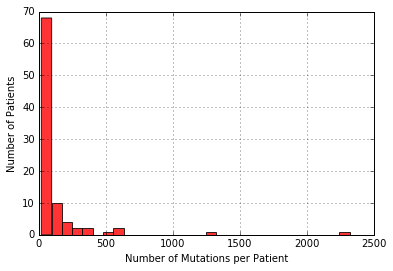

In [30]:
%matplotlib inline
ax = maf_df3.Patient_Barcode.value_counts().hist(color='r', alpha=0.8, bins=30)
ax.set_xlabel("Number of Mutations per Patient")
ax.set_ylabel("Number of Patients")

####What kinds of mutations are we dealing with?

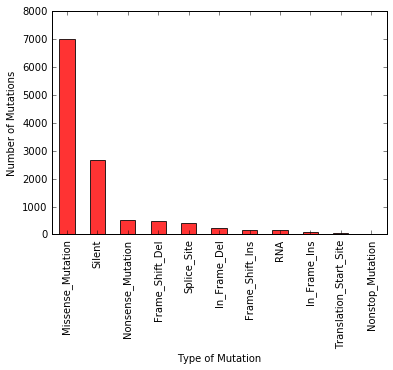

In [31]:
ax = maf_df3.Variant_Classification.value_counts().plot(kind='bar', color='r', alpha=0.8)
ax.set_ylabel("Number of Mutations")
ax.set_xlabel("Type of Mutation")

####Which genes are most frequently mutated?

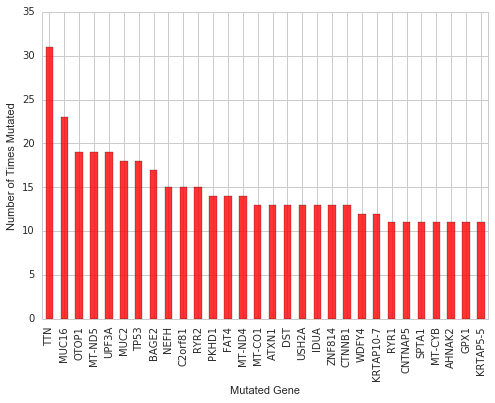

In [32]:
import seaborn as sns
sns.set_style("whitegrid")
ax = maf_df3['Hugo_Symbol'].value_counts()[:30].plot(kind='bar', color='r', alpha=0.8)
ax.set_xlabel("Mutated Gene")
ax.set_ylabel("Number of Times Mutated")

#Let's get some genetic interaction information about our genes...

#### In order to use machine learning to predict our "driver" genes, we need to create a useful feature vector. The best predicting algorithms use many features - we are going to use three fairly simple ones. One feature will be the possible disruption of a gene as measured by the number of other genes in which it interacts.

####<a href="http://www.functionalnet.org/humannet">Human Net</a> is a probabilistic functional gene network of nearly 20,000 validated protein coding genes constructed by the integration of 21 'omics' data types.

####Picture something like this:

<img src="images/gene_network.jpg">

In [36]:
edges = {}
with open('data/HumanNet.v1.join.txt', 'r') as human_net:
    for line in human_net:
        c = [x for x in line.strip().split("\t")]
        one = int(c[0])
        two = int(c[1])
        
        if one in edges:
            edges[one].append(two)
        else:
            edges[one] = [two]
        if two in edges:
            edges[two].append(one)
        else:
            edges[two] = [one]


####Is it possible to save a dictionary? Yes! Pickle!
* Pickle can be used for any serializable object; however, it does not compress the object

In [38]:
# this works in python 2.7
#import cPickle as pickle 
#pickle.dump(edges, open("pickles/edges.p", 'wb'))

In [44]:
connect = list(map(len, edges.values()))

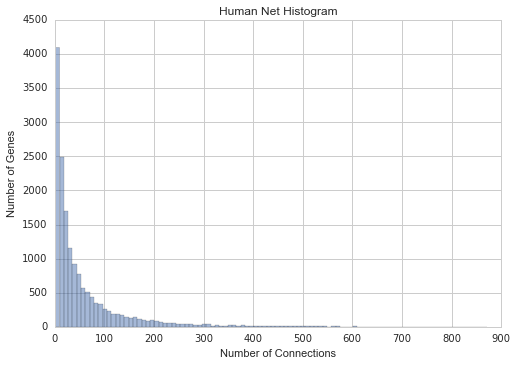

In [45]:
n, bins, patches = plt.hist(connect, bins=100, alpha=0.5)
plt.xlabel('Number of Connections')
plt.ylabel('Number of Genes')
plt.title('Human Net Histogram')
plt.grid(True)

In [46]:
#Now that we have a fancy network feature, let's create a couple other simple features.

In [47]:
####How often is the gene mutated in TCGA? If a gene is mutated more frequently, it could mean that there is selective pressure toward mutation.

In [48]:
mutations = pd.DataFrame(maf_df3.Entrez_Gene_Id.value_counts())
mutations = mutations.reset_index()
mutations.columns = ['Entrez_Gene_Id', 'counts']
mutations.head()

,Entrez_Gene_Id,counts
0,7273,31
1,94025,23
2,4540,19
3,65110,19
4,133060,19


In [49]:
maf_df3.head()

,Hugo_Symbol,Entrez_Gene_Id,Patient_Barcode,Variant_Classification,Both_Alleles,Start_position
0,KLHL3,26249,TCGA-OR-A5J1,Missense_Mutation,False,136973018
1,KLHDC4,54758,TCGA-OR-A5J1,Missense_Mutation,False,87742934
2,HIST1H3B,8358,TCGA-OR-A5J1,Missense_Mutation,False,26031919
3,GABRA1,2554,TCGA-OR-A5J1,Silent,False,161300197
4,SCARF1,8578,TCGA-OR-A5J1,Silent,False,1543262


In [50]:
grouped = maf_df3.groupby('Entrez_Gene_Id')
num_bi_allelic = grouped.apply(lambda g: g[g['Both_Alleles'] == False].count())['Patient_Barcode']
num_total = grouped['Patient_Barcode'].agg('count')

In [51]:
####Thanks to numpy, we can divide these series by each other. Then we can add the new series to our mutations dataframe.

In [52]:
mutations['Perc_Bi_Allelic'] = pd.Series(num_bi_allelic)/pd.Series(num_total)
mutations.head()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic
0,7273,31,NaN
1,94025,23,1.0
2,4540,19,NaN
3,65110,19,NaN
4,133060,19,NaN


In [53]:
mutations.to_csv('data/mutations.csv')

####Here, we import a txt file containing a density score for each gene that can be derived from our human net analysis. We are going to spare the details because of time and just import it.

In [54]:
densities = pd.read_csv('data/density_values.txt', sep=' ', header=None)
densities.columns = ["Entrez_Gene_Id", "Density"]
densities.head()


,Entrez_Gene_Id,Density
0,673,1298.9
1,2312,135.1
2,4893,1736.6
3,113146,NaN
4,94025,14.2


#####Merging pandas dataframes is quite handy (and fast)! Check out all of the ways they can be combined <a href="http://pandas.pydata.org/pandas-docs/stable/merging.html">here</a>.

In [55]:
mutations = pd.merge(mutations, densities, on='Entrez_Gene_Id', how='outer')
mutations.head()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic,Density
0,7273.0,31.0,NaN,1011.3
1,94025.0,23.0,1.0,14.2
2,4540.0,19.0,NaN,NaN
3,65110.0,19.0,NaN,NaN
4,133060.0,19.0,NaN,NaN


In [58]:
mutations = mutations[["Entrez_Gene_Id", "counts", "Perc_Bi_Allelic", "Density"]]
mutations.to_csv('data/tcga_feature_vector.csv')

# What's Next?

Well building predictive models of course. --- check out sklearn 

###Also check out these useful libraries
* cython - a python to C source code translator; could be used to speed up your code
* Rpy2 - integrate your R code with python code
* sqlite - interact with a sql database
* scikit-bio - still in beta, but has promise
* future - division, print